In [73]:
import numpy as np # linear algebra
from scipy import signal
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import time
%matplotlib inline
import tensorflow
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv1D, MaxPool1D, BatchNormalization
from keras.layers.advanced_activations import LeakyReLU, PReLU
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
from sklearn.model_selection import train_test_split

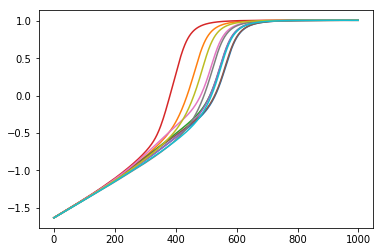

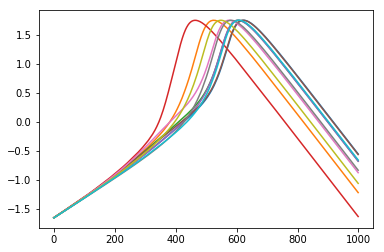

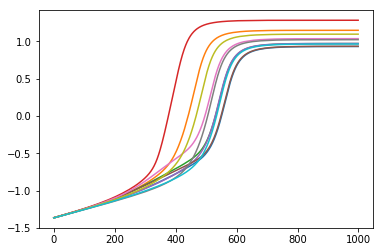

(8, 1000, 3) (8, 8) (2, 1000, 3) (2, 8)


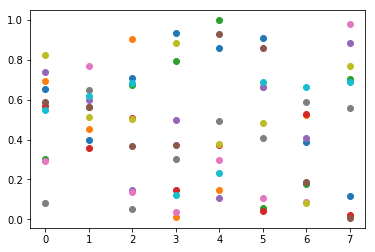

In [77]:
X=np.loadtxt('X.csv',delimiter=',')
Y=np.loadtxt('Y.csv',delimiter=',')

X=np.reshape(X,(-1,1000,3))

for i in range(3):
    mean=np.mean(X[:,:,i])
    std=np.std(X[:,:,i])
    X[:,:,i]=(X[:,:,i]-mean)/std

plt.plot(np.transpose(X[:,:,0]))
plt.show()
plt.plot(np.transpose(X[:,:,1]))
plt.show()
plt.plot(np.transpose(X[:,:,2]))
plt.show()

m=4
Y[:,:m]=Y[:,:m]-1
Y[:,m:]=np.log10(Y[:,m:])/2

plt.plot(np.transpose(Y),'o')
    
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

print(np.shape(x_train),np.shape(y_train),np.shape(x_test),np.shape(y_test))

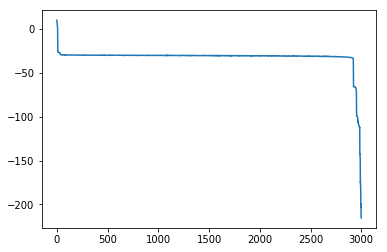

(10, 3)


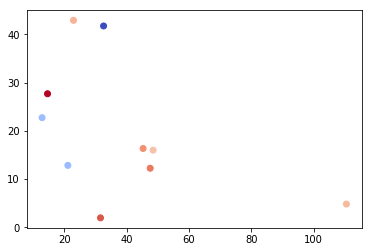

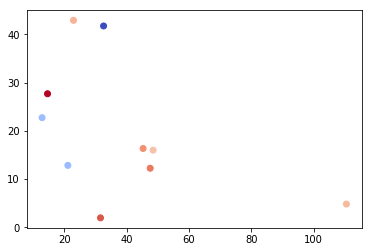

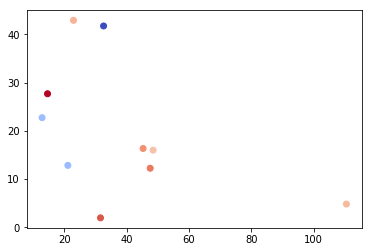

In [78]:
#Data Analysis
X = np.reshape(np.transpose(X,(0,2,1)),(-1,1000*3))
X=(X-np.mean(X,axis=0))/np.std(X,axis=0)
X_=np.matrix.transpose(X)

#lambd,W=np.linalg.eig(np.matmul(X_,X))

plt.plot(np.log(lambd))
plt.show()

Z=np.abs(np.matmul(X,W[:,:3]))
print(np.shape(Z))

for i in range(3):
    plt.scatter(Z[:,0],Z[:,1], c=Y[:,0], cmap="coolwarm")
    plt.show()



In [79]:
model = Sequential()

model.add(Flatten(input_shape=(1000,3)))
model.add(Dense(2048, activation='linear'))
model.add(LeakyReLU(alpha=.1))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(4046, activation='linear'))
model.add(LeakyReLU(alpha=.1))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(2048, activation='linear'))
model.add(LeakyReLU(alpha=.1))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(8, activation='sigmoid'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 3000)              0         
_________________________________________________________________
dense_17 (Dense)             (None, 2048)              6146048   
_________________________________________________________________
leaky_re_lu_13 (LeakyReLU)   (None, 2048)              0         
_________________________________________________________________
batch_normalization_13 (Batc (None, 2048)              8192      
_________________________________________________________________
dropout_13 (Dropout)         (None, 2048)              0         
_________________________________________________________________
dense_18 (Dense)             (None, 4046)              8290254   
_________________________________________________________________
leaky_re_lu_14 (LeakyReLU)   (None, 4046)              0         
__________

In [80]:
model.compile(loss='mean_squared_error', optimizer = Adam(lr=1e-4), metrics=["accuracy"]) #binary_crossentropy

annealer = LearningRateScheduler(lambda x: 1e-3 * 0.9 ** x)

hist = model.fit(x=x_train, y=y_train, batch_size=512,
                           epochs=20, #Increase this when not on Kaggle kernel
                           verbose=2,  #1 for ETA, 0 for silent
                           validation_data=(x_test, y_test), #For speed
                           callbacks=[annealer])

Train on 8 samples, validate on 2 samples
Epoch 1/20
 - 5s - loss: 0.1717 - acc: 0.1250 - val_loss: 0.3859 - val_acc: 0.0000e+00
Epoch 2/20
 - 0s - loss: 0.1564 - acc: 0.2500 - val_loss: 0.4010 - val_acc: 0.0000e+00
Epoch 3/20
 - 0s - loss: 0.1544 - acc: 0.5000 - val_loss: 0.3306 - val_acc: 0.0000e+00
Epoch 4/20
 - 0s - loss: 0.1473 - acc: 0.2500 - val_loss: 0.3417 - val_acc: 0.0000e+00
Epoch 5/20
 - 0s - loss: 0.1402 - acc: 0.3750 - val_loss: 0.3232 - val_acc: 0.0000e+00
Epoch 6/20
 - 0s - loss: 0.1341 - acc: 0.3750 - val_loss: 0.2937 - val_acc: 0.0000e+00
Epoch 7/20
 - 0s - loss: 0.1185 - acc: 0.3750 - val_loss: 0.3113 - val_acc: 0.0000e+00
Epoch 8/20
 - 0s - loss: 0.1036 - acc: 0.3750 - val_loss: 0.3187 - val_acc: 0.0000e+00
Epoch 9/20
 - 0s - loss: 0.0834 - acc: 0.3750 - val_loss: 0.3183 - val_acc: 0.0000e+00
Epoch 10/20
 - 0s - loss: 0.0735 - acc: 0.2500 - val_loss: 0.3469 - val_acc: 0.0000e+00
Epoch 11/20
 - 0s - loss: 0.0891 - acc: 0.2500 - val_loss: 0.3591 - val_acc: 0.0000e+00

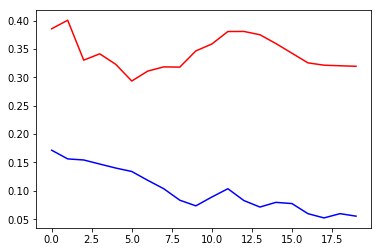

In [81]:
plt.plot(hist.history['loss'], color='b')
plt.plot(hist.history['val_loss'], color='r')
plt.show()

In [82]:
model.evaluate(x_test, y_test)

2/2 [==============================] - 0s 7ms/step


[0.3197321891784668, 0.0]

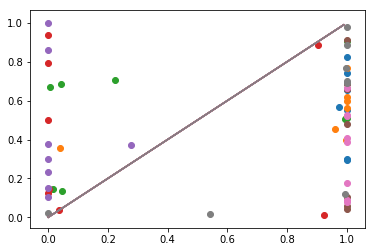

In [83]:
for i in range(8):
    plt.scatter(model.predict(x_train)[:,i],y_train[:,i])
    plt.plot(np.arange(0,1,0.01),np.arange(0,1,0.01))
plt.show()

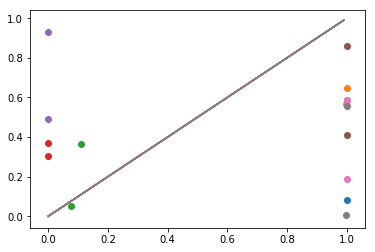

In [84]:
for i in range(8):
    plt.scatter(model.predict(x_test)[:,i],y_test[:,i])
    plt.plot(np.arange(0,1,0.01),np.arange(0,1,0.01))
plt.show()